In [5]:
import pandas as pd
import requests
import urllib3
import os
import pickle

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [6]:
cache_file = 'cache/demand_data_cache.pkl'

if os.path.exists(cache_file):
    demand_data = pickle.load(open(cache_file, 'rb'))
    print(f"Loaded from cache: {demand_data.shape}")
else:
    urls = {
        '2009': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/ed8a37cb-65ac-4581-8dbc-a3130780da3a/download/demanddata_2009.csv',
        '2010': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/b3eae4a5-8c3c-4df1-b9de-7db243ac3a09/download/demanddata_2010.csv',
        '2011': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/01522076-2691-4140-bfb8-c62284752efd/download/demanddata_2011.csv',
        '2012': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/4bf713a2-ea0c-44d3-a09a-63fc6a634b00/download/demanddata_2012.csv',
        '2013': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/2ff7aaff-8b42-4c1b-b234-9446573a1e27/download/demanddata_2013.csv',
        '2014': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/b9005225-49d3-40d1-921c-03ee2d83a2ff/download/demanddata_2014.csv',
        '2015': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/cc505e45-65ae-4819-9b90-1fbb06880293/download/demanddata_2015.csv',
        '2016': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/3bb75a28-ab44-4a0b-9b1c-9be9715d3c44/download/demanddata_2016.csv',
        '2017': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/2f0f75b8-39c5-46ff-a914-ae38088ed022/download/demanddata_2017.csv',
        '2018': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/fcb12133-0db0-4f27-a4a5-1669fd9f6d33/download/demanddata_2018.csv',
        '2019': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/dd9de980-d724-415a-b344-d8ae11321432/download/demanddata_2019.csv',
        '2020': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/33ba6857-2a55-479f-9308-e5c4c53d4381/download/demanddata_2020.csv',
        '2021': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/18c69c42-f20d-46f0-84e9-e279045befc6/download/demanddata_2021.csv',
        '2022': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/bb44a1b5-75b1-4db2-8491-257f23385006/download/demanddata_2022.csv',
        '2023': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/bf5ab335-9b40-4ea4-b93a-ab4af7bce003/download/demanddata_2023.csv',
        '2024': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/f6d02c0f-957b-48cb-82ee-09003f2ba759/download/demanddata_2024.csv',
        '2025': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/b2bde559-3455-4021-b179-dfe60c0337b0/download/demanddata_2025.csv'
    }

    all_data = []
    for year, url in urls.items():
        response = requests.get(url, verify=False)
        yearly_data = pd.read_csv(pd.io.common.StringIO(response.text))
        yearly_data['YEAR'] = year
        all_data.append(yearly_data)
        print(f"{year}: {yearly_data.shape}")

    demand_data = pd.concat(all_data, ignore_index=True)
    pickle.dump(demand_data, open(cache_file, 'wb'))
    print(f"Cached data: {demand_data.shape}")

print(f"Final: {demand_data.shape}")

Loaded from cache: (293566, 23)
Final: (293566, 23)


In [7]:
demand_data.sort_values(['SETTLEMENT_DATE'], ascending=False)

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,YEAR,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW,SCOTTISH_TRANSFER
259995,31-Oct-23,28,32044,33553,29358,1251,6488,2201,16559,0,...,251,-447,-455,999,2023,1395.0,997.0,0.0,0.0,1971.0
260003,31-Oct-23,36,37207,37809,34048,1202,6488,0,16559,0,...,549,27,0,1019,2023,1395.0,993.0,0.0,0.0,2397.0
259994,31-Oct-23,27,32014,33597,29345,1305,6488,2415,16559,0,...,281,-451,-527,999,2023,1395.0,997.0,0.0,0.0,2308.0
259973,31-Oct-23,6,21084,22842,19520,1355,6488,0,16559,0,...,466,-372,-527,505,2023,1395.0,999.0,0.0,0.0,3535.0
259996,31-Oct-23,29,32049,33631,29359,1191,6488,1756,16559,0,...,-299,-370,-303,970,2023,1396.0,997.0,0.0,0.0,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,01-APR-2009,31,40938,41821,36921,216,1613,0,0,0,...,0,-376,0,0,2009,NaN,NaN,NaN,NaN,NaN
4347,01-APR-2009,30,41371,42185,37366,216,1613,0,0,0,...,0,-306,0,0,2009,NaN,NaN,NaN,NaN,NaN
4346,01-APR-2009,29,41701,42508,37694,168,1613,0,0,0,...,0,-296,0,0,2009,NaN,NaN,NaN,NaN,NaN
4345,01-APR-2009,28,41905,42710,37859,168,1613,0,0,0,...,0,-296,0,0,2009,NaN,NaN,NaN,NaN,NaN


In [8]:
demand_data['SETTLEMENT_DATE'] = pd.to_datetime(demand_data['SETTLEMENT_DATE'])

/var/folders/l8/p1qr4lw566x40b3d6dqt7dpr0000gs/T/ipykernel_44540/1222740280.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  demand_data['SETTLEMENT_DATE'] = pd.to_datetime(demand_data['SETTLEMENT_DATE'])


In [9]:
demand_data['TSD_ND_GAP'] = demand_data['TSD'] - demand_data['ND']

In [42]:
demand_data

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,YEAR,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW,SCOTTISH_TRANSFER,TSD_ND_GAP
0,2009-01-01,1,37910,38704,33939,54,1403,0,0,0,...,-161,0,0,2009,NaN,NaN,NaN,NaN,NaN,794
1,2009-01-01,2,38047,38964,34072,53,1403,0,0,0,...,-160,0,0,2009,NaN,NaN,NaN,NaN,NaN,917
2,2009-01-01,3,37380,38651,33615,53,1403,0,0,0,...,-160,0,0,2009,NaN,NaN,NaN,NaN,NaN,1271
3,2009-01-01,4,36426,37775,32526,50,1403,0,0,0,...,-160,0,0,2009,NaN,NaN,NaN,NaN,NaN,1349
4,2009-01-01,5,35687,37298,31877,50,1403,0,0,0,...,-160,0,0,2009,NaN,NaN,NaN,NaN,NaN,1611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293561,2025-09-29,44,28422,29869,26027,730,6606,0,20993,0,...,-6,0,543,2025,1397.0,998.0,-611.0,20.0,2605.0,1447
293562,2025-09-29,45,26347,28021,24145,746,6606,0,20993,0,...,27,0,80,2025,1397.0,980.0,-566.0,146.0,2817.0,1674
293563,2025-09-29,46,25181,26858,23128,762,6606,0,20993,0,...,0,0,45,2025,1397.0,978.0,-564.0,106.0,3011.0,1677
293564,2025-09-29,47,23861,25542,21935,801,6606,0,20993,0,...,-25,0,125,2025,1397.0,995.0,-777.0,7.0,3040.0,1681


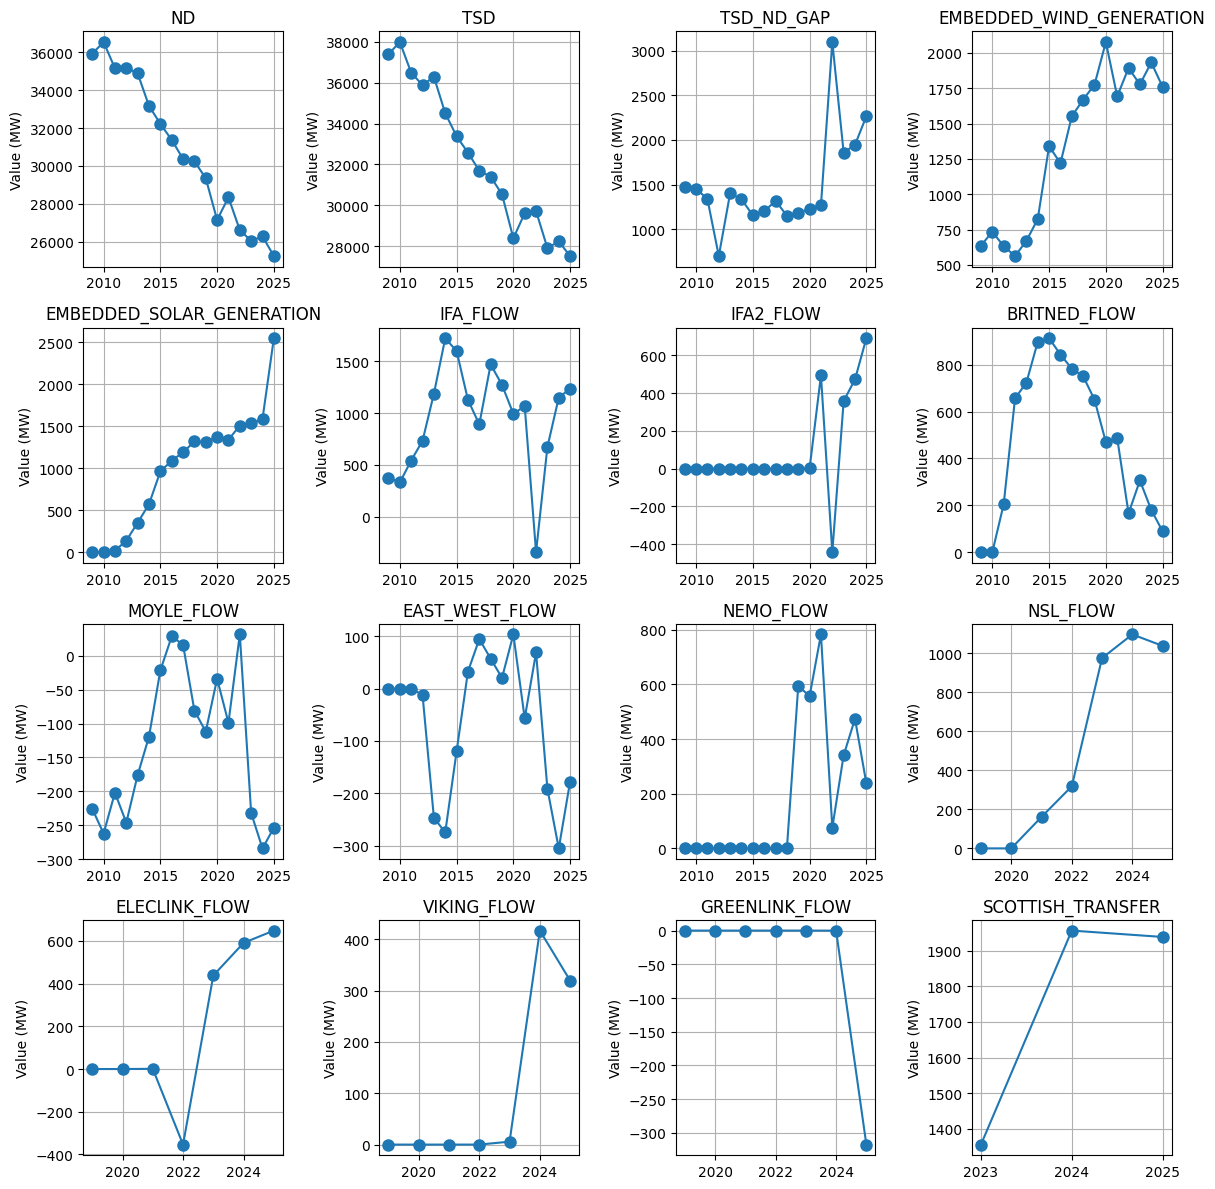

In [10]:
import math
import matplotlib.pyplot as plt
# First subplot - Yearly average demand
yearly_averages = demand_data.groupby(demand_data['SETTLEMENT_DATE'].dt.year).mean(numeric_only=True).reset_index()
cols = [x for x in yearly_averages.columns if x not in ['SETTLEMENT_DATE','SETTLEMENT_PERIOD']]
cols = ['ND', 'TSD', 'TSD_ND_GAP','EMBEDDED_WIND_GENERATION', 'EMBEDDED_SOLAR_GENERATION', 'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW','EAST_WEST_FLOW','NEMO_FLOW', 'NSL_FLOW','ELECLINK_FLOW','VIKING_FLOW','GREENLINK_FLOW','SCOTTISH_TRANSFER']
n_cols = len(cols)
grid_size = math.ceil(math.sqrt(n_cols))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(3*grid_size, 3*grid_size))

for i, col in enumerate(cols):
    ax = axes[i // grid_size, i % grid_size]
    ax.plot(yearly_averages['SETTLEMENT_DATE'], yearly_averages[col], marker='o', markersize=8)
    ax.set_title(f'{col}')
    ax.grid(True)
    ax.set_ylabel('Value (MW)')

plt.tight_layout()
plt.show()

In [11]:
import json
import pandas as pd
  # Load the JSON file
with open('generation_mix.json', 'r') as f:
    gen_data = json.load(f)
generation_df = pd.DataFrame(gen_data['result']['records'])
print(generation_df.shape)

(294552, 36)


In [12]:
generation_df.dtypes

RENEWABLE_perc      object
NUCLEAR             object
HYDRO_perc          object
STORAGE             object
IMPORTS_perc        object
SOLAR_perc          object
LOW_CARBON          object
BIOMASS_perc        object
HYDRO               object
STORAGE_perc        object
WIND_EMB            object
WIND_perc           object
IMPORTS             object
LOW_CARBON_perc     object
GAS                 object
COAL_perc           object
CARBON_INTENSITY    object
COAL                object
FOSSIL              object
ZERO_CARBON_perc    object
FOSSIL_perc         object
GENERATION_perc     object
GENERATION          object
DATETIME            object
OTHER               object
NUCLEAR_perc        object
ZERO_CARBON         object
WIND_EMB_perc       object
_full_text          object
BIOMASS             object
GAS_perc            object
OTHER_perc          object
WIND                object
SOLAR               object
_id                  int64
RENEWABLE           object
dtype: object

## Fetch Nordpool Volumes and Prices in the Day Ahead Auction so we can compare to the National Demand

In [13]:
from scrapers.nordpool import scrape_nordpool, scrape_nordpool_volumes
SETTLEMENT_DATE = "2025-10-17"

In [14]:
nord_pool_df = scrape_nordpool(SETTLEMENT_DATE)
print(f"Extracted {len(nord_pool_df)} rows")

Fetching fresh data for 2025-10-17
Extracted 24 rows


In [15]:
nord_pool_volumes_df = scrape_nordpool_volumes(SETTLEMENT_DATE)

Fetching volume data for 2025-10-17


In [16]:
print(nord_pool_volumes_df.shape, "\n"*1 ,nord_pool_volumes_df.dtypes)
print(nord_pool_df.shape, "\n"*1 ,nord_pool_df.dtypes)

(24, 3) 
 period          object
buy_volume     float64
sell_volume    float64
dtype: object
(24, 2) 
 period     object
price     float64
dtype: object


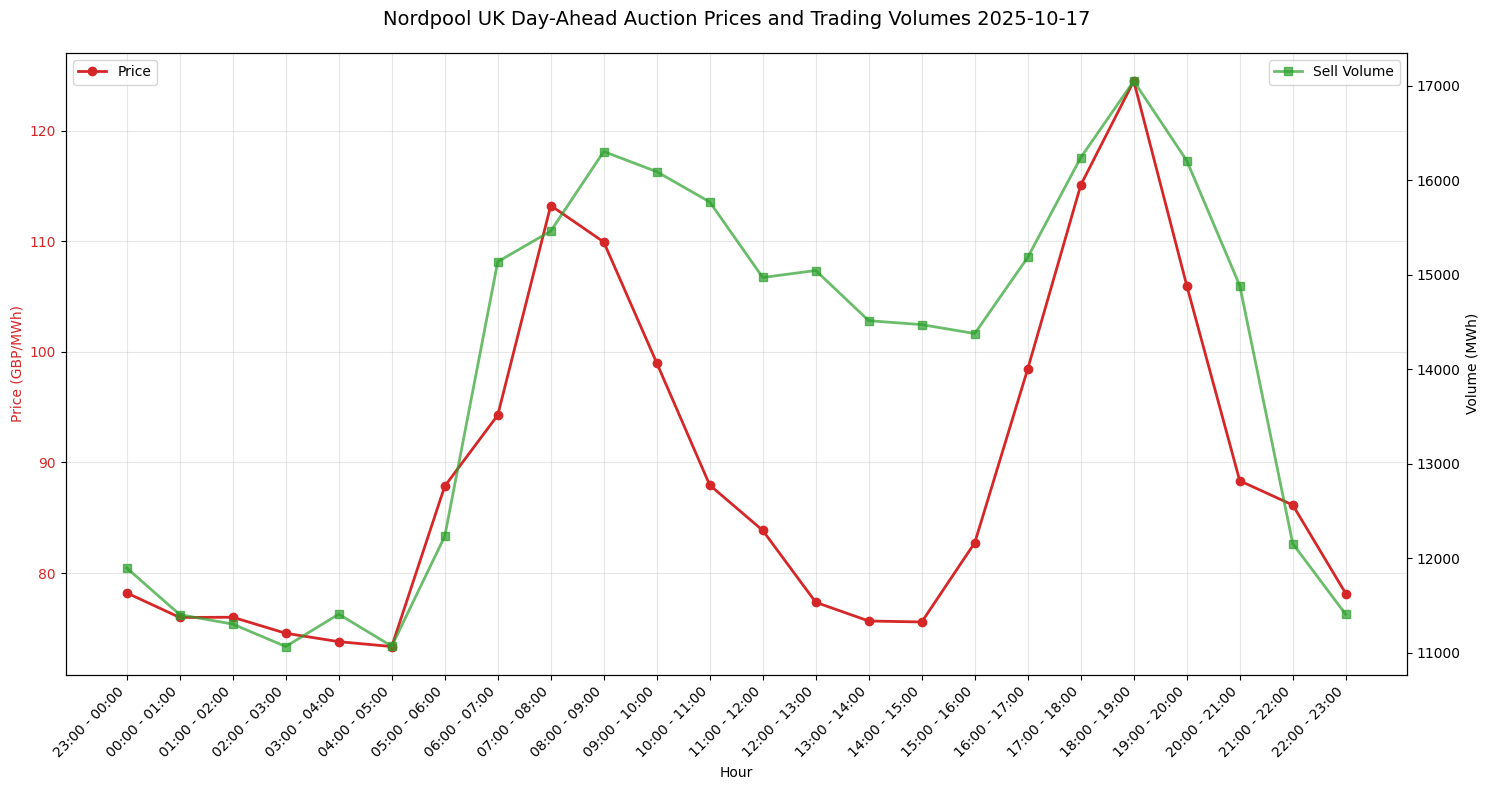

In [48]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot price on left y-axis
color = 'tab:red'; color_buy = 'tab:blue'; color_sell = 'tab:green'
ax1.set_xlabel('Hour'); ax1.set_ylabel('Price (GBP/MWh)', color=color)
ax1.plot(range(len(nord_pool_df)), nord_pool_df['price'], marker='o', color=color, label='Price', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color); ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.set_ylabel('Volume (MWh)', color='black')
# ax2.plot(range(len(nord_pool_volumes_df)), nord_pool_volumes_df['buy_volume'], marker='x', color=color_buy, label='Buy Volume', linewidth=2, alpha=0.7)
ax2.plot(range(len(nord_pool_volumes_df)), nord_pool_volumes_df['sell_volume'], marker='s', color=color_sell, label='Sell Volume', linewidth=2, alpha=0.7)
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticks(range(len(nord_pool_df)))
ax1.set_xticklabels(nord_pool_df['period'], rotation=45, ha='right')
plt.title(f'Nordpool UK Day-Ahead Auction Prices and Trading Volumes {SETTLEMENT_DATE}', fontsize=14, pad=20)
ax1.legend(loc='upper left'); ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [18]:
# Let's get volumes from EPEX i.e EEX Day Ahead Auctions.
from scrapers.elexon import get_apx_market_index

In [19]:
from scrapers.elexon import get_demand_outturn_stream, get_actual_total_load
apx_data = get_apx_market_index('2025-10-16', '2025-10-18').query('settlementDate == @SETTLEMENT_DATE')

In [49]:
apx_data_sorted = apx_data[['settlementPeriod', 'price', 'volume']].drop_duplicates().sort_values('settlementPeriod')

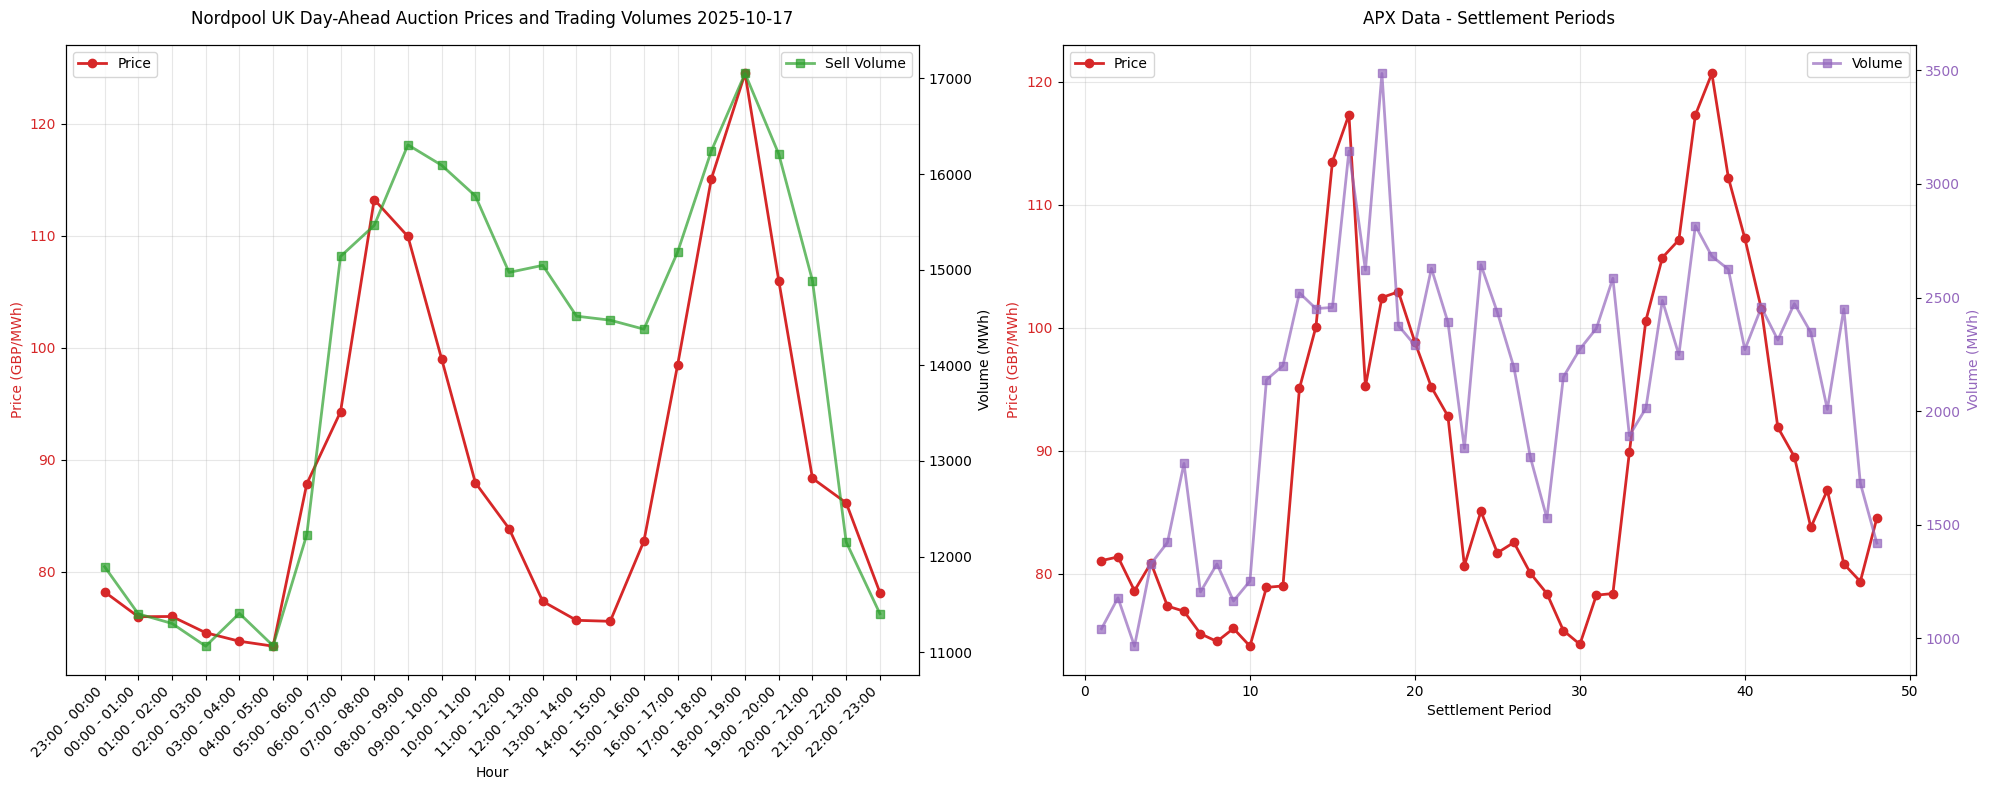

In [53]:
import matplotlib.pyplot as plt

# Create figure with two subplots side by side
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(20, 8))

# ============ FIRST SUBPLOT (Nordpool) ============
color = 'tab:red'
color_buy = 'tab:blue'
color_sell = 'tab:green'

ax1.set_xlabel('Hour')
ax1.set_ylabel('Price (GBP/MWh)', color=color)
ax1.plot(range(len(nord_pool_df)), nord_pool_df['price'], marker='o', color=color, label='Price', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.set_ylabel('Volume (MWh)', color='black')
ax2.plot(range(len(nord_pool_volumes_df)), nord_pool_volumes_df['sell_volume'], marker='s', color=color_sell, label='Sell Volume', linewidth=2, alpha=0.7)
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticks(range(len(nord_pool_df)))
ax1.set_xticklabels(nord_pool_df['period'], rotation=45, ha='right')
ax1.set_title(f'Nordpool UK Day-Ahead Auction Prices and Trading Volumes {SETTLEMENT_DATE}', fontsize=12, pad=15)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# ============ SECOND SUBPLOT (APX Data) ============
color_price = 'tab:red'
color_volume = 'tab:purple'

ax3.set_xlabel('Settlement Period')
ax3.set_ylabel('Price (GBP/MWh)', color=color_price)
ax3.plot(apx_data_sorted['settlementPeriod'], apx_data_sorted['price'], marker='o', color=color_price, label='Price', linewidth=2)
ax3.tick_params(axis='y', labelcolor=color_price)
ax3.grid(True, alpha=0.3)

ax4 = ax3.twinx()
ax4.set_ylabel('Volume (MWh)', color=color_volume)
ax4.plot(apx_data_sorted['settlementPeriod'], apx_data_sorted['volume'], marker='s', color=color_volume, label='Volume', linewidth=2, alpha=0.7)
ax4.tick_params(axis='y', labelcolor=color_volume)

ax3.set_title('APX Data - Settlement Periods', fontsize=12, pad=15)
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

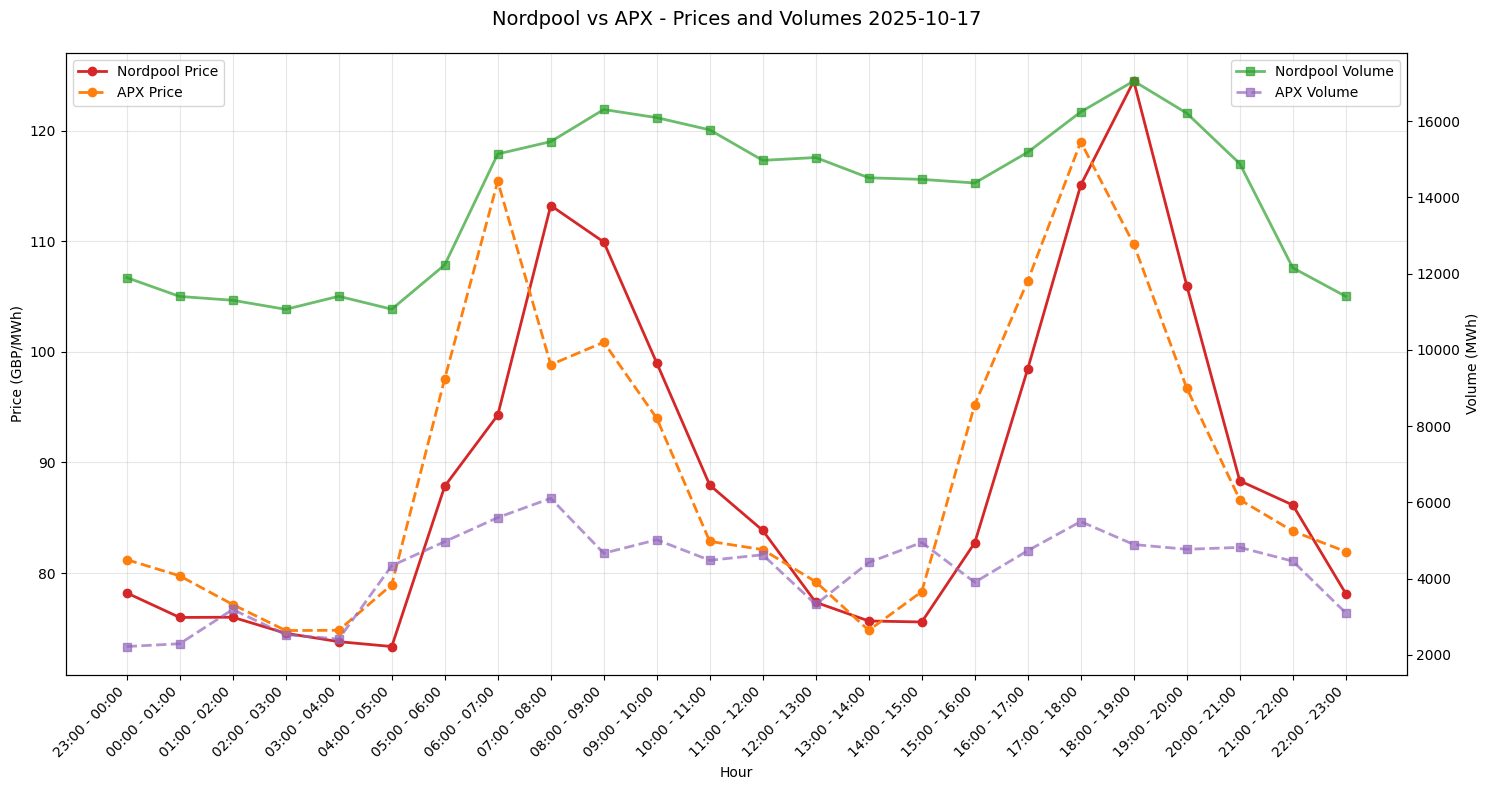

In [57]:
import pandas as pd

apx_hourly = apx_data_sorted.copy()
apx_hourly['hour'] = ((apx_data_sorted['settlementPeriod'] - 1) // 2) + 1
apx_hourly_agg = apx_hourly.groupby('hour').agg({
    'price': 'mean',
    'volume': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(15, 8))

color_np_price = 'tab:red'
color_apx_price = 'tab:orange'
color_np_volume = 'tab:green'
color_apx_volume = 'tab:purple'

ax1.set_xlabel('Hour')
ax1.set_ylabel('Price (GBP/MWh)', color='black')
ax1.plot(range(len(nord_pool_df)), nord_pool_df['price'], marker='o', color=color_np_price, label='Nordpool Price', linewidth=2)
ax1.plot(apx_hourly_agg['hour']-1, apx_hourly_agg['price'], marker='o', color=color_apx_price, label='APX Price', linewidth=2, linestyle='--')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.set_ylabel('Volume (MWh)', color='black')
ax2.plot(range(len(nord_pool_volumes_df)), nord_pool_volumes_df['sell_volume'], marker='s', color=color_np_volume, label='Nordpool Volume', linewidth=2, alpha=0.7)
ax2.plot(apx_hourly_agg['hour']-1, apx_hourly_agg['volume'], marker='s', color=color_apx_volume, label='APX Volume', linewidth=2, alpha=0.7, linestyle='--')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticks(range(len(nord_pool_df)))
ax1.set_xticklabels(nord_pool_df['period'], rotation=45, ha='right')
ax1.set_title(f'Nordpool vs APX - Prices and Volumes {SETTLEMENT_DATE}', fontsize=14, pad=20)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Fetch Current Day Actual Demand from Elexon

In [20]:
demand_outturn = get_demand_outturn_stream(SETTLEMENT_DATE,SETTLEMENT_DATE)
actual_demand_load = get_actual_total_load(SETTLEMENT_DATE)
actual_demand_load.sort_values('settlementPeriod', inplace=True)

In [21]:
demand_outturn

,publishTime,startTime,settlementDate,settlementPeriod,initialDemandOutturn,initialTransmissionSystemDemandOutturn,hour
0,2025-10-16T23:30:00Z,2025-10-16T23:00:00Z,2025-10-17,1,23870,25844,0
1,2025-10-17T00:00:00Z,2025-10-16T23:30:00Z,2025-10-17,2,23564,25428,0
2,2025-10-17T00:30:00Z,2025-10-17T00:00:00Z,2025-10-17,3,23579,25551,1
3,2025-10-17T01:00:00Z,2025-10-17T00:30:00Z,2025-10-17,4,23453,25355,1
4,2025-10-17T01:30:00Z,2025-10-17T01:00:00Z,2025-10-17,5,23261,25144,2
5,2025-10-17T02:00:00Z,2025-10-17T01:30:00Z,2025-10-17,6,22587,24424,2
6,2025-10-17T02:30:00Z,2025-10-17T02:00:00Z,2025-10-17,7,22245,24104,3
7,2025-10-17T03:00:00Z,2025-10-17T02:30:00Z,2025-10-17,8,21996,23776,3
8,2025-10-17T03:30:00Z,2025-10-17T03:00:00Z,2025-10-17,9,21635,23492,4
9,2025-10-17T04:00:00Z,2025-10-17T03:30:00Z,2025-10-17,10,21200,23037,4


In [22]:
demand_outturn.dtypes

publishTime                               object
startTime                                 object
settlementDate                            object
settlementPeriod                           int64
initialDemandOutturn                       int64
initialTransmissionSystemDemandOutturn     int64
hour                                       int64
dtype: object

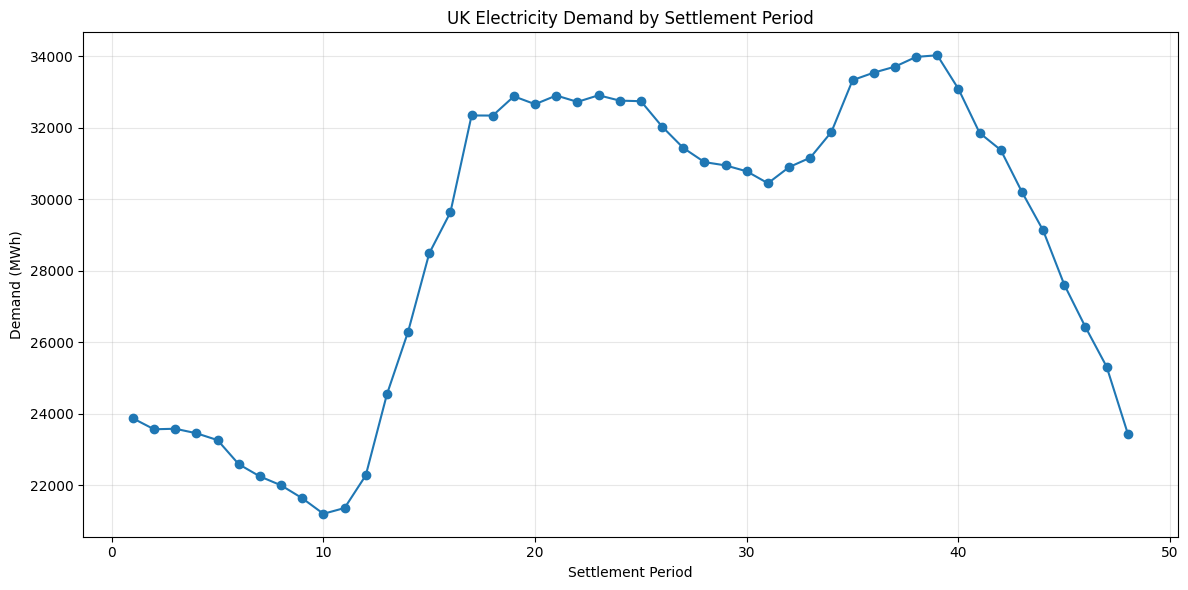

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(demand_outturn['settlementPeriod'], demand_outturn['initialDemandOutturn'], marker='o')
plt.title('UK Electricity Demand by Settlement Period')
plt.xlabel('Settlement Period'); plt.ylabel('Demand (MWh)')
plt.grid(True, alpha=0.3); plt.tight_layout(); 
# plt.show()


In [24]:
hourly_demand = demand_outturn.groupby(['hour'],as_index=False)['initialDemandOutturn'].mean()
hourly_demand.shape

(24, 2)

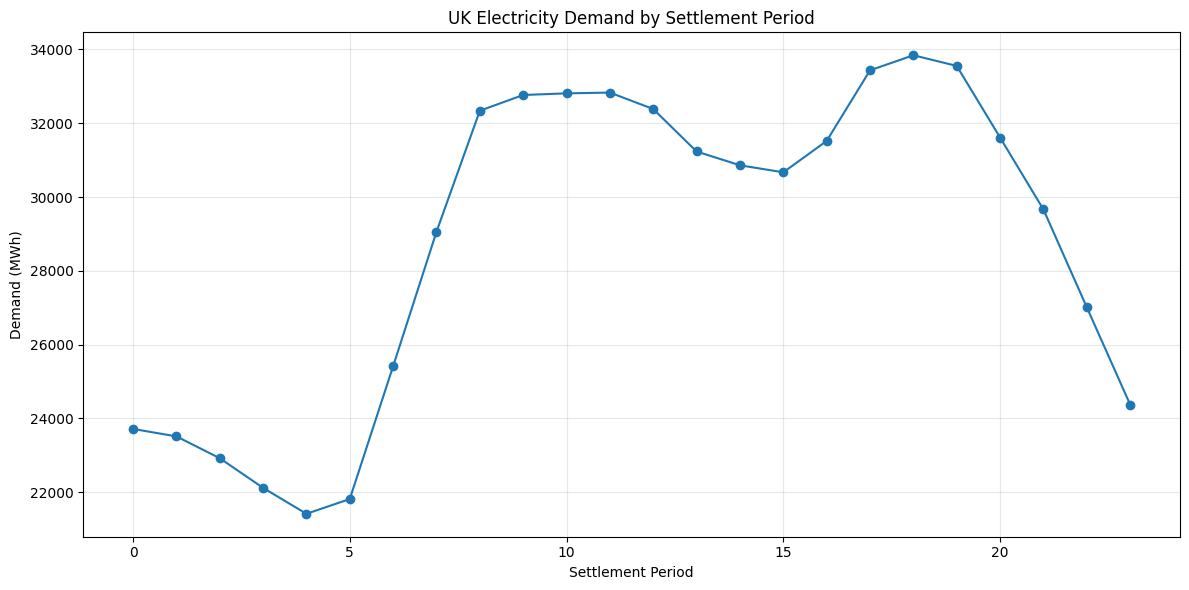

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_demand.hour, hourly_demand.initialDemandOutturn, marker='o')
plt.title('UK Electricity Demand by Settlement Period')
plt.xlabel('Settlement Period'); plt.ylabel('Demand (MWh)')
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


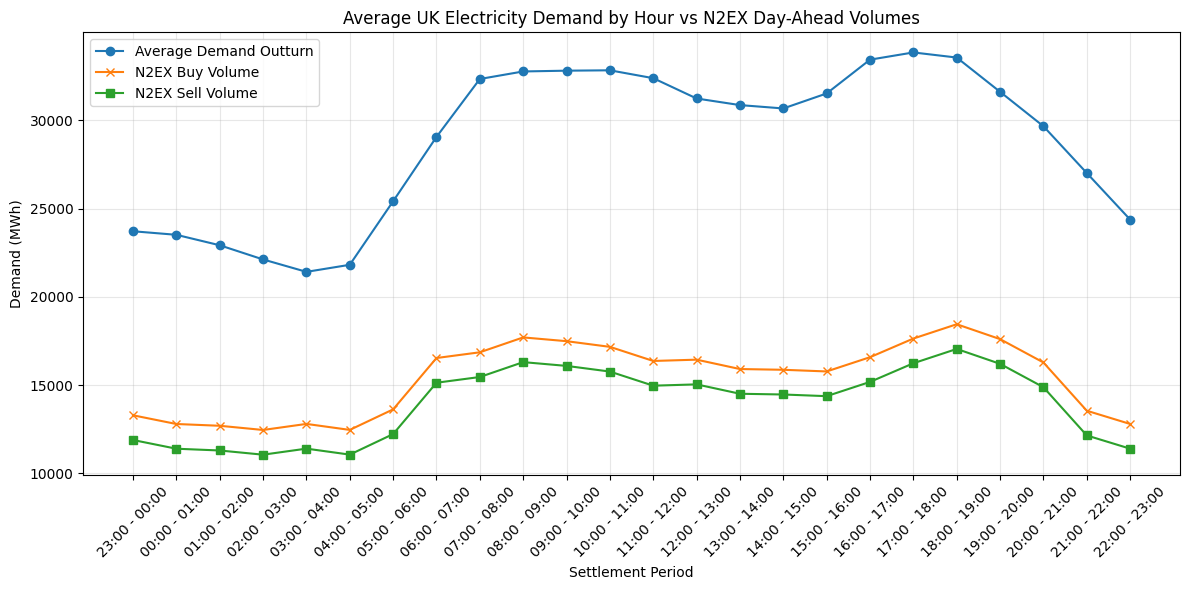

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title('Average UK Electricity Demand by Hour vs N2EX Day-Ahead Volumes')
plt.plot(hourly_demand['hour'], hourly_demand['initialDemandOutturn'], marker='o', label='Average Demand Outturn')
plt.plot(nord_pool_volumes_df['period'], nord_pool_volumes_df['buy_volume'], marker='x', label='N2EX Buy Volume')
plt.plot(nord_pool_volumes_df['period'], nord_pool_volumes_df['sell_volume'], marker='s', label='N2EX Sell Volume')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Settlement Period'); plt.ylabel('Demand (MWh)')
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


In [47]:
nord_pool_df

,period,price
0,23:00 - 00:00,78.20
1,00:00 - 01:00,75.98
2,01:00 - 02:00,76.00
3,02:00 - 03:00,74.55
4,03:00 - 04:00,73.79
5,04:00 - 05:00,73.35
6,05:00 - 06:00,87.85
7,06:00 - 07:00,94.28
8,07:00 - 08:00,113.24
9,08:00 - 09:00,109.94


Loading from cache: ../cache/generation_fuel_2025-10-17_2025-10-17.pkl


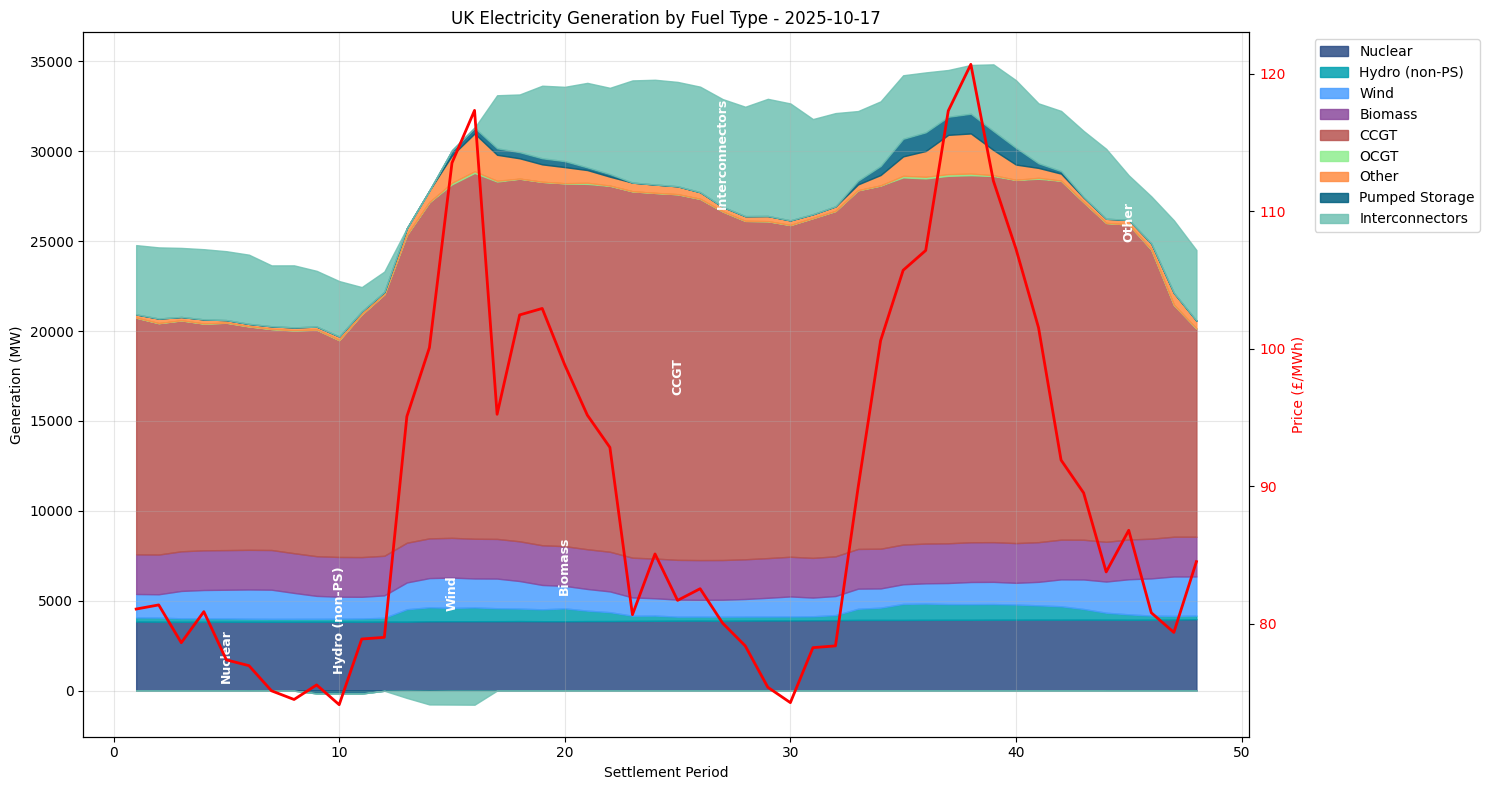

In [27]:
from scrapers.elexon import get_generation_by_fuel
fuel_generation = get_generation_by_fuel(SETTLEMENT_DATE)
fuel_mapping = {'BIOMASS': 'Biomass', 'CCGT': 'CCGT', 'COAL': 'Coal', 'NUCLEAR': 'Nuclear', 'NPSHYD': 'Hydro (non-PS)', 'OCGT': 'OCGT', 'OIL': 'Oil', 'OTHER': 'Other', 'PS': 'Pumped Storage', 'WIND': 'Wind'}
interconnector_mapping = {'INTELEC': 'Eleclink (INTELEC)', 'INTEW': 'Ireland (East-West)', 'INTFR': 'France (IFA)', 'INTGRNL': 'Ireland (Greenlink)', 'INTIFA2': 'France (IFA2)', 'INTIRL': 'Northern Ireland (Moyle)', 'INTNED': 'Netherlands (BritNed)', 'INTNEM': 'Belgium (Nemolink)', 'INTNSL': 'North Sea Link (INTNSL)', 'INTVKL': 'Denmark (Viking link)'}
fuel_generation['fuel_category'] = fuel_generation['fuelType'].map(fuel_mapping); fuel_generation.loc[fuel_generation['fuelType'].isin(interconnector_mapping.keys()), 'fuel_category'] = 'Interconnectors'
pivot_df = fuel_generation.groupby(['settlementPeriod', 'fuel_category'])['generation'].sum().unstack(fill_value=0)
category_colors = {'Nuclear': '#2b4c85', 'Hydro (non-PS)': '#00a0b0', 'Wind': '#4a9eff', 'Biomass': '#8b4a9c', 'CCGT': '#b85450', 'OCGT': '#90ee90', 'Coal': '#333333', 'Oil': '#7a7a7a', 'Other': '#ff8c42', 'Pumped Storage': '#006080', 'Interconnectors': '#70c1b3'}
generation_order = ['Nuclear', 'Hydro (non-PS)', 'Wind', 'Biomass', 'CCGT', 'OCGT', 'Coal', 'Oil', 'Other', 'Pumped Storage', 'Interconnectors']

fig, ax1 = plt.subplots(figsize=(15, 8))
bottom_pos = pd.Series([0] * len(pivot_df.index), index=pivot_df.index); bottom_neg = pd.Series([0] * len(pivot_df.index), index=pivot_df.index)
label_positions = [5, 10, 15, 20, 25, 30, 35, 40, 45, 12, 27]
for i, category in enumerate(generation_order):
    if category in pivot_df.columns:
        values = pivot_df[category]
        color = category_colors.get(category, '#888888')

        positive_vals = values.clip(lower=0); negative_vals = values.clip(upper=0)

        if positive_vals.sum() > 0:
            ax1.fill_between(pivot_df.index, bottom_pos, bottom_pos + positive_vals,
                            label=category, color=color, alpha=0.85)
            avg_val = positive_vals.mean()
            if avg_val > 200 and i < len(label_positions):
                label_settlement = label_positions[i]
                if label_settlement <= len(positive_vals):
                    idx = label_settlement - 1
                    y_pos = bottom_pos.iloc[idx] + positive_vals.iloc[idx]/2
                    ax1.text(label_settlement, y_pos, category,
                            ha='center', va='center', fontsize=9, rotation=90,
                            color='white', weight='bold')
            bottom_pos += positive_vals

        if negative_vals.sum() < 0:
            ax1.fill_between(pivot_df.index, bottom_neg, bottom_neg + negative_vals,
                            color=color, alpha=0.85)
            avg_val = abs(negative_vals.mean())
            if avg_val > 200 and i < len(label_positions):
                label_settlement = label_positions[i]
                if label_settlement <= len(negative_vals):
                    idx = label_settlement - 1
                    y_pos = bottom_neg.iloc[idx] + negative_vals.iloc[idx]/2
                    ax1.text(label_settlement, y_pos, category,
                            ha='center', va='center', fontsize=9, rotation=90,
                            color='white', weight='bold')
            bottom_neg += negative_vals

ax1.set_xlabel('Settlement Period'); ax1.set_ylabel('Generation (MW)'); ax1.set_title(f'UK Electricity Generation by Fuel Type - {SETTLEMENT_DATE}'); 
ax1.grid(True, alpha=0.3); ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

apx_data_sorted = apx_data[['settlementPeriod', 'price', 'volume']].drop_duplicates().sort_values('settlementPeriod')
ax2 = ax1.twinx()
ax2.plot(apx_data_sorted['settlementPeriod'], apx_data_sorted['price'], color='red', linewidth=2, label='Price')
ax2.set_ylabel('Price (£/MWh)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

In [30]:
pivot_df.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype='int64', name='settlementPeriod')

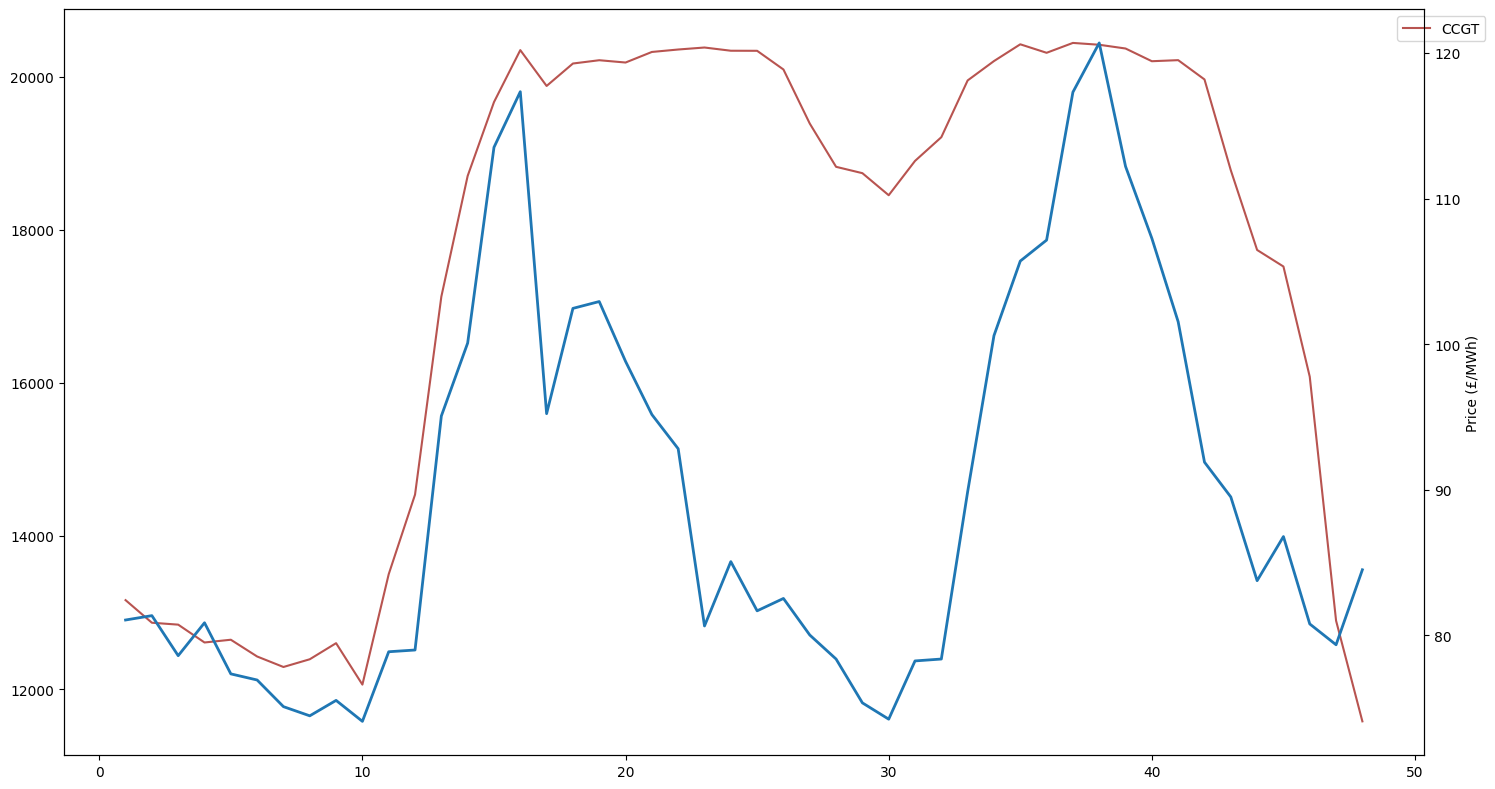

In [41]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# for category in pivot_df.columns:
for category in ['CCGT']:    
    values = pivot_df[category]
    color = category_colors.get(category, '#888888')
    ax1.plot(pivot_df.index, values, color=color, label=category)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2 = ax1.twinx()
ax2.plot(apx_data_sorted['settlementPeriod'], apx_data_sorted['price'], linewidth=2, label='Price')
ax2.set_ylabel('Price (£/MWh)')
ax2.tick_params(axis='y')
ax1.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

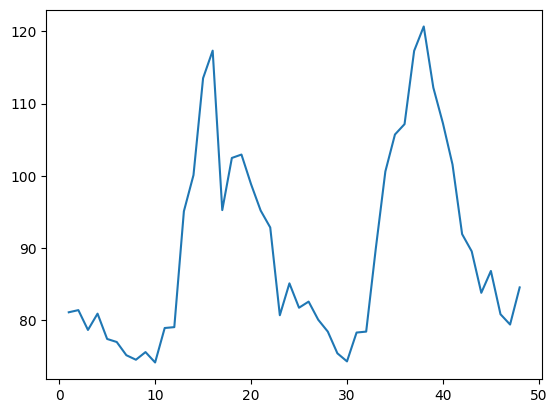